# Portuguese Bank Marketing Project

**Tasks:**
1. Complete data analysis report
2. Create a predictive model to predict whether a customer will subscribe to a term deposit (`y`)
3. Suggestions for the bank marketing team

---

This notebook is ready to run. Place the dataset `bank-additional-full.csv` (from the project zip's `bank-additional` folder) into the working directory or change the `DATA_PATH` variable in the data-loading cell.


In [1]:
# Imports - run first
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import joblib
sns.set(style='whitegrid')
print('Libraries imported.')

Libraries imported.


In [2]:
df = pd.read_csv(r"bank-additional-full.csv", sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Data loading

The dataset file required: `bank-additional-full.csv` (from the project ZIP under `Data > bank-additional`).

Place it in the notebook working directory or change `DATA_PATH` below to the correct path.

## Quick Data Inspection

Run the cell below to see basic info, types, missing values, and head of the dataset.

In [3]:
if df is None:
    print('Dataset not loaded. Put the CSV in the working directory and re-run the cell above.')
else:
    display(df.head())
    print('\nInfo:')
    display(df.info())
    print('\nMissing values per column:')
    display(df.isnull().sum())
    print('\nTarget value counts:')
    display(df['y'].value_counts())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 no

None


Missing values per column:


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0



Target value counts:


,count
y,
no,36548
yes,4640


## Exploratory Data Analysis (EDA)

We'll visualize distributions, categorical counts, and correlations. Run the cell below after dataset is loaded.

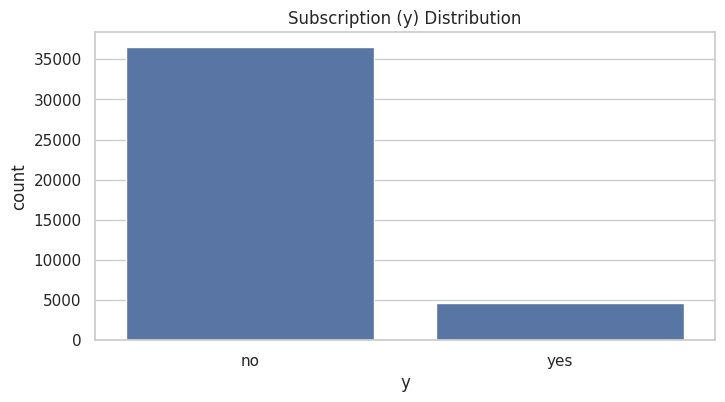

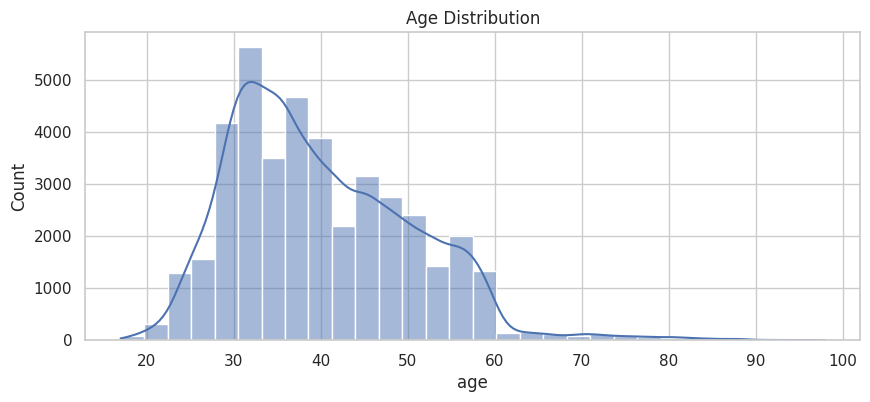

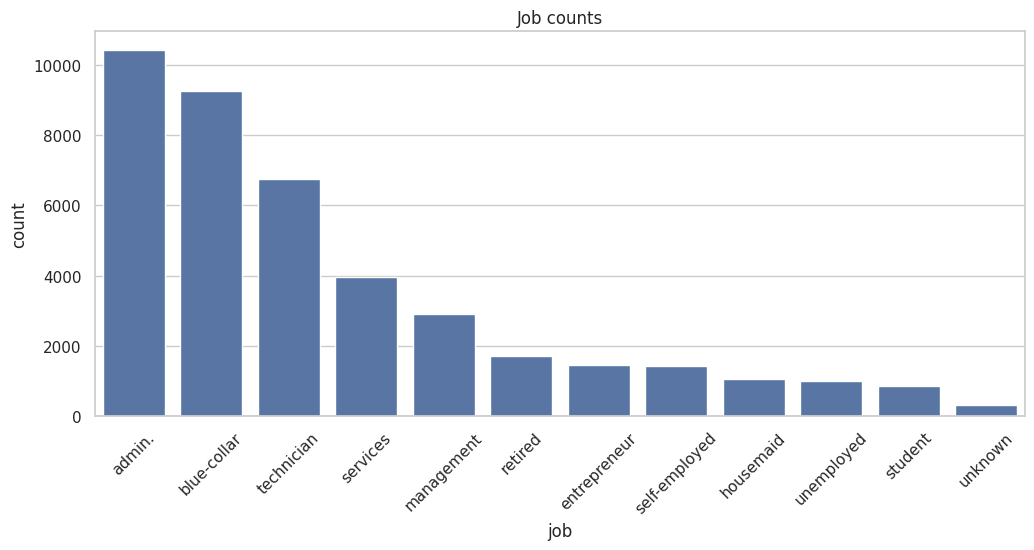

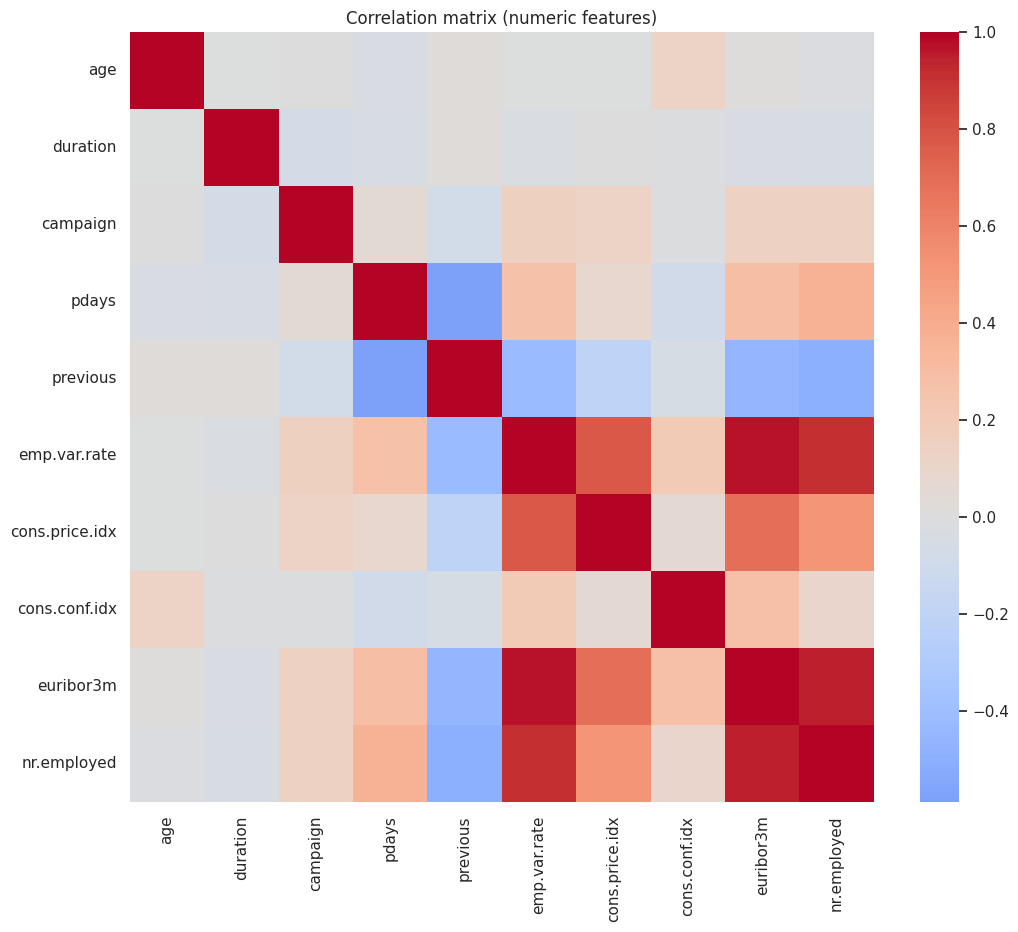

<Figure size 1000x500 with 0 Axes>

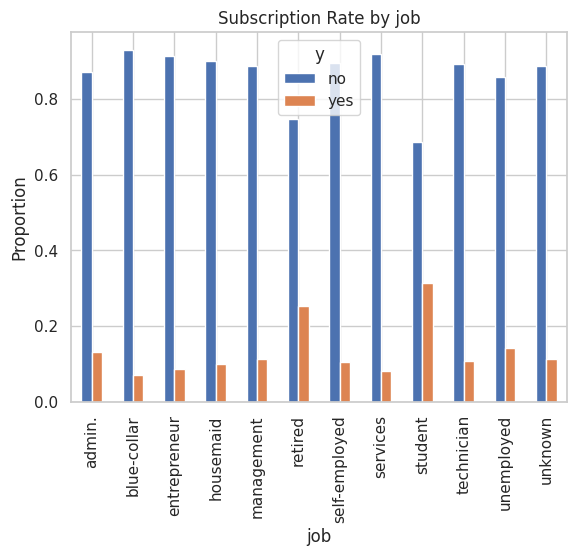

<Figure size 1000x500 with 0 Axes>

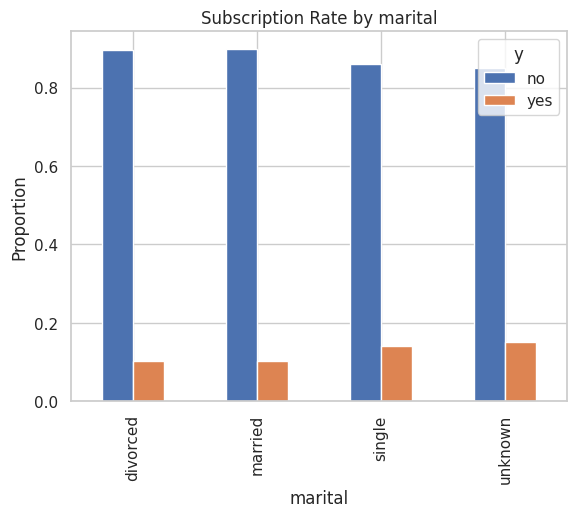

<Figure size 1000x500 with 0 Axes>

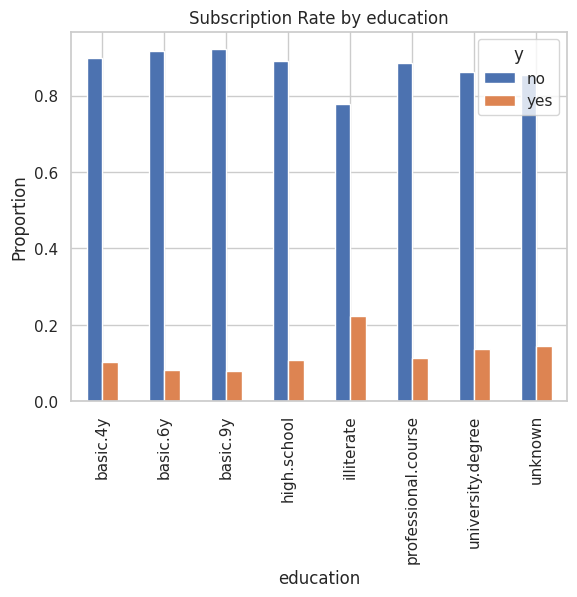

<Figure size 1000x500 with 0 Axes>

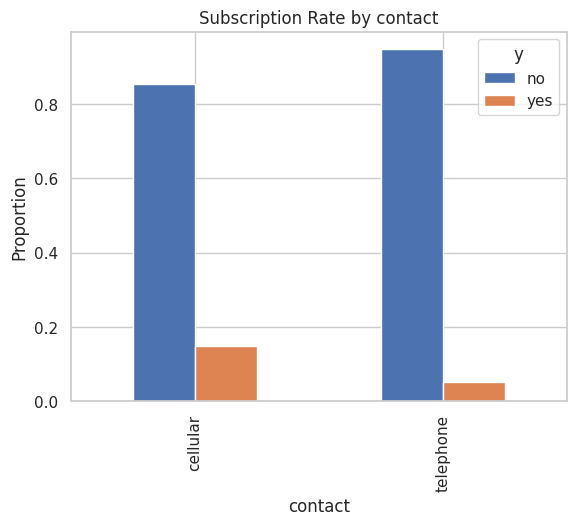

<Figure size 1000x500 with 0 Axes>

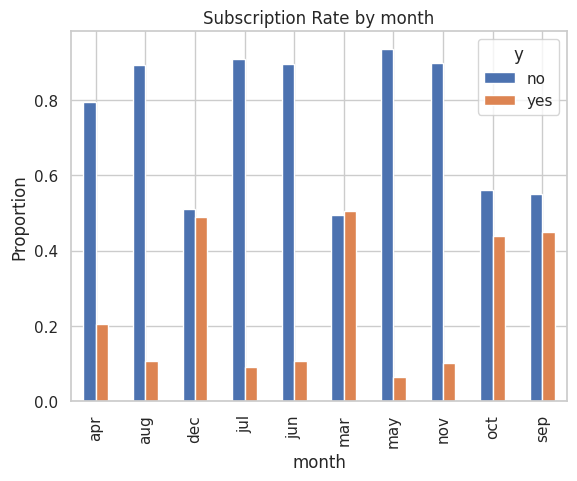

<Figure size 1000x500 with 0 Axes>

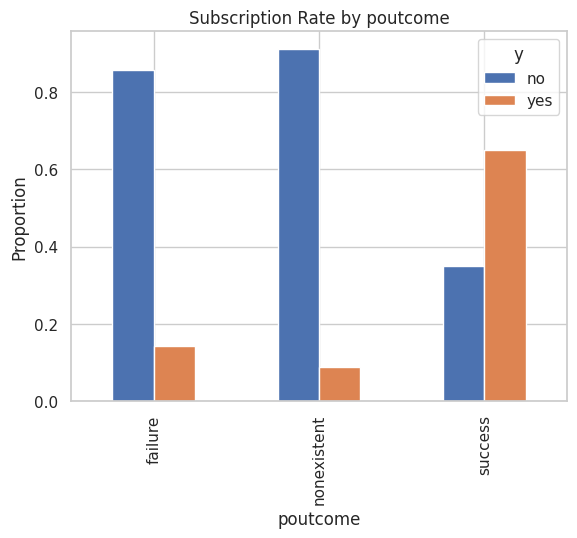

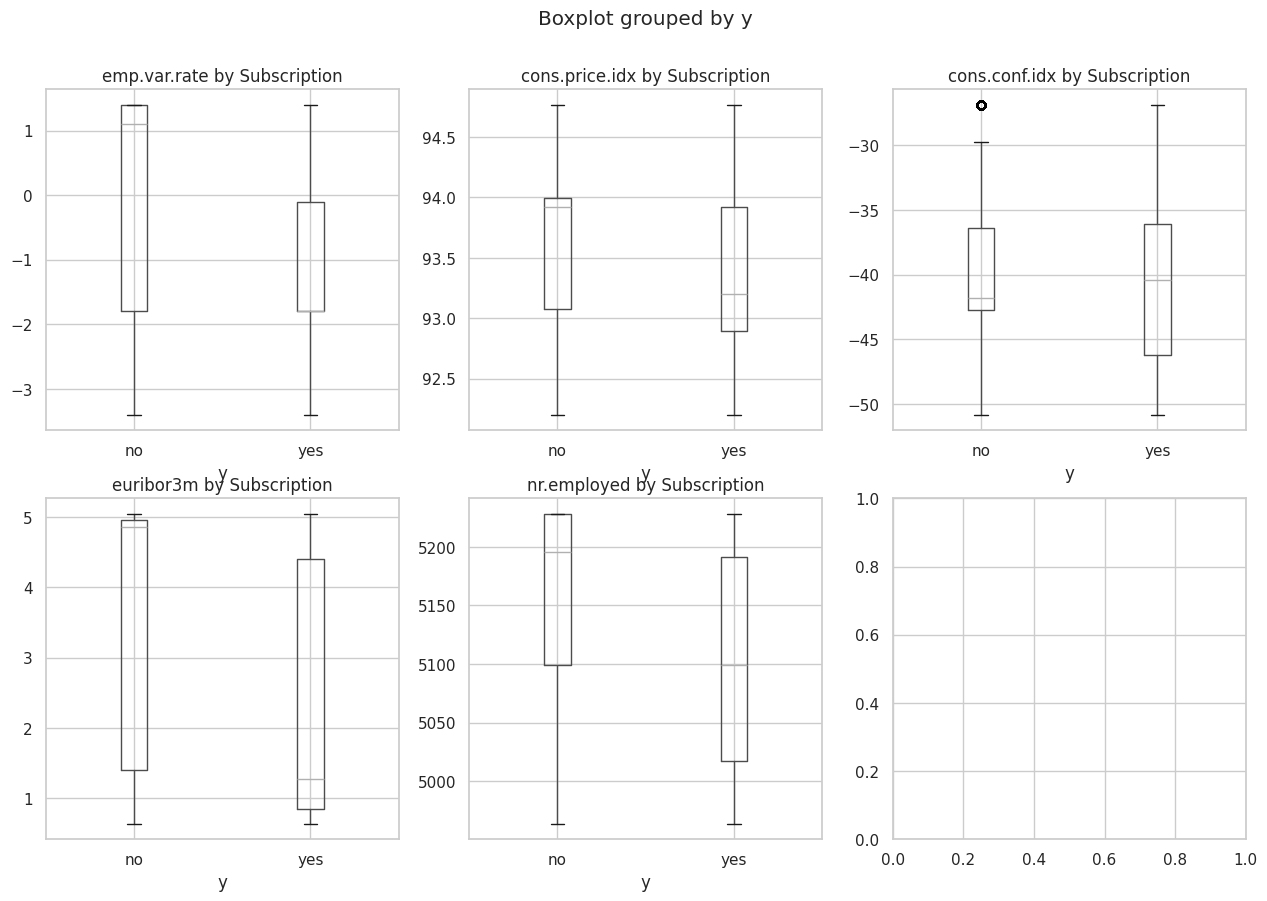

In [4]:
if df is None:
    print('Load dataset first.')
else:
    plt.figure(figsize=(8,4))
    sns.countplot(x='y', data=df)
    plt.title('Subscription (y) Distribution')
    plt.show()

    plt.figure(figsize=(10,4))
    sns.histplot(df['age'], bins=30, kde=True)
    plt.title('Age Distribution')
    plt.show()

    plt.figure(figsize=(12,5))
    job_order = df['job'].value_counts().index
    sns.countplot(x='job', data=df, order=job_order)
    plt.xticks(rotation=45)
    plt.title('Job counts')
    plt.show()

    num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    plt.figure(figsize=(12,10))
    sns.heatmap(df[num_cols].corr(), annot=False, cmap='coolwarm', center=0)
    plt.title('Correlation matrix (numeric features)')
    plt.show()

    # Bivariate analysis examples
for col in ['job', 'marital', 'education', 'contact', 'month', 'poutcome']:
    plt.figure(figsize=(10,5))
    pd.crosstab(df[col], df['y'], normalize='index').plot(kind='bar')
    plt.title(f'Subscription Rate by {col}')
    plt.ylabel('Proportion')
    plt.show()

# Economic indicators vs target
fig, axes = plt.subplots(2, 3, figsize=(15,10))
for idx, col in enumerate(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']):
    ax = axes[idx//3, idx%3]
    df.boxplot(column=col, by='y', ax=ax)
    ax.set_title(f'{col} by Subscription')


## Preprocessing

Steps:
- Encode categorical variables with OneHot (or ordinal where applicable)
- Impute if necessary
- Drop or ignore `duration` if you want a realistic predictive model (as per dataset note) or keep it for benchmark.

This notebook will show both approaches: (A) benchmark model **with** `duration` and (B) realistic model **without** `duration`. Choose one when training.

In [5]:
if df is None:
    print('Load dataset first.')
else:
    data = df.copy()
    data['y'] = data['y'].map({'yes':1, 'no':0})
    print('Positive rate:', data['y'].mean())

    categorical_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
    numeric_cols = [c for c in data.columns if c not in categorical_cols + ['y']]

    with_duration = data.copy()
    without_duration = data.drop(columns=['duration']).copy() if 'duration' in data.columns else data.copy()

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preproc_with = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='drop')

    print('Preprocessing pipelines constructed.')

Positive rate: 0.11265417111780131
Preprocessing pipelines constructed.


## Train/Test Split and Modeling (Benchmark and Realistic)

We will train several models and compare performance. This cell trains using the 'without_duration' dataset by default (realistic).

Train shape: (32950, 19) Test shape: (8238, 19)
Preprocessing done. Feature matrix shape: (32950, 62)

Model: Logistic Regression
Accuracy: 0.8350 | Precision: 0.3679 | Recall: 0.6466 | F1: 0.4689 | ROC AUC: 0.8009


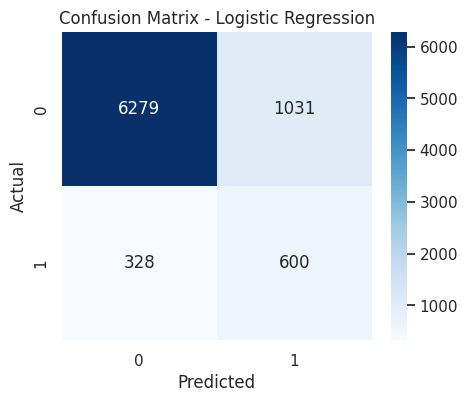


Model: Decision Tree
Accuracy: 0.8468 | Precision: 0.3216 | Recall: 0.3244 | F1: 0.3230 | ROC AUC: 0.6192


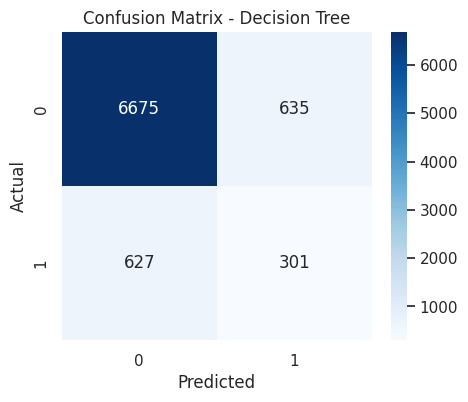


Model: Random Forest
Accuracy: 0.8948 | Precision: 0.5659 | Recall: 0.2823 | F1: 0.3767 | ROC AUC: 0.7823


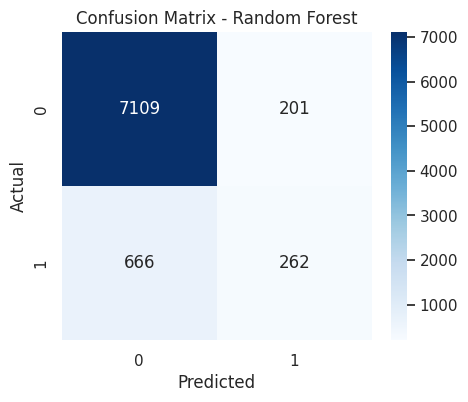


Model: Gradient Boosting
Accuracy: 0.9020 | Precision: 0.6734 | Recall: 0.2532 | F1: 0.3681 | ROC AUC: 0.8124


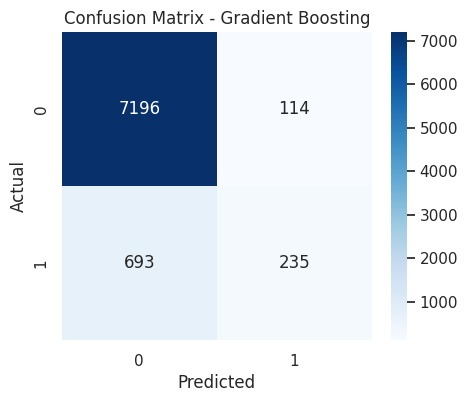

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,Logistic Regression,0.835033,0.367872,0.646552,0.468933,0.800942
1,Decision Tree,0.846807,0.321581,0.324353,0.322961,0.619170
2,Random Forest,0.894756,0.565875,0.282328,0.376707,0.782280
3,Gradient Boosting,0.902039,0.673352,0.253233,0.368050,0.812430



 RECOMMENDATION FOR PRODUCTION:
Best Model: Logistic Regression
Reason: Highest F1 (0.469) and ROC AUC (0.801), good precision-recall balance.


In [6]:


# ============================
# DATA PREPARATION
# ============================
if df is None:
    print('Load dataset first.')
else:
    # If not defined earlier
    with_duration = df.copy()
    without_duration = df.drop(columns=['duration'])

    use_benchmark = False  # True if you want to include 'duration'
    data_use = with_duration if use_benchmark else without_duration

    data_use['y'] = data_use['y'].map({'yes': 1, 'no': 0})


    X = data_use.drop(columns=['y'])
    y = data_use['y']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)
    print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

    # Define transformers if not already done
    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                        'loan', 'contact', 'month', 'day_of_week', 'poutcome']
    categorical_cols = [c for c in categorical_cols if c in X.columns]
    numeric_cols = [c for c in X.columns if c not in categorical_cols]

    preproc = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='drop')

    preproc.fit(X_train)
    X_train_t = preproc.transform(X_train)
    X_test_t = preproc.transform(X_test)
    print('Preprocessing done. Feature matrix shape:', X_train_t.shape)

    # ============================
    # MODEL EVALUATION FUNCTION
    # ============================
    def evaluate_model(clf, name):
        clf.fit(X_train_t, y_train)
        y_pred = clf.predict(X_test_t)
        y_proba = clf.predict_proba(X_test_t)[:, 1] if hasattr(clf, 'predict_proba') else None

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

        print(f"\nModel: {name}")
        print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f} | ROC AUC: {auc:.4f}")

        # Display confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        return [name, acc, prec, rec, f1, auc]

    # ============================
    # MODEL LIST
    # ============================
    models = [
        (LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42), 'Logistic Regression'),
        (DecisionTreeClassifier(random_state=42, class_weight='balanced'), 'Decision Tree'),
        (RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'), 'Random Forest'),
        (GradientBoostingClassifier(n_estimators=200, random_state=42), 'Gradient Boosting')
    ]

    # ============================
    # RUN MODELS AND COLLECT RESULTS
    # ============================
    results = []
    for clf, name in models:
        metrics = evaluate_model(clf, name)
        results.append(metrics)

    # ============================
    # MODEL COMPARISON REPORT
    # ============================
    results_summary = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC'])
    display(results_summary)

    # ============================
    # BEST MODEL RECOMMENDATION
    # ============================
    best_model = results_summary.sort_values(by=['F1', 'ROC_AUC'], ascending=False).iloc[0]
    print("\n RECOMMENDATION FOR PRODUCTION:")
    print(f"Best Model: {best_model['Model']}")
    print(f"Reason: Highest F1 ({best_model['F1']:.3f}) and ROC AUC ({best_model['ROC_AUC']:.3f}), good precision-recall balance.")


## Hyperparameter Tuning (Random Forest example)

This cell runs a GridSearchCV for RandomForest. It may take time depending on data size.

In [ ]:
if df is not None:
    param_grid = {
        'n_estimators': [100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    }
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(rf, param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=3)
    try:
        grid.fit(X_train_t, y_train)
        print('Best params:', grid.best_params_)
        best_rf = grid.best_estimator_
        # define evaluate_model here because earlier cell scope might not contain it when run separately
        def evaluate_model_local(clf, name):
            y_pred = clf.predict(X_test_t)
            y_proba = clf.predict_proba(X_test_t)[:,1] if hasattr(clf, 'predict_proba') else None
            print('\nModel:', name)
            print('Accuracy:', accuracy_score(y_test, y_pred))
            print('Precision:', precision_score(y_test, y_pred))
            print('Recall:', recall_score(y_test, y_pred))
            print('F1:', f1_score(y_test, y_pred))
            if y_proba is not None:
                print('ROC AUC:', roc_auc_score(y_test, y_proba))
            display(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose())
        evaluate_model_local(best_rf, 'Best Random Forest (GridSearch)')
    except Exception as e:
        print('GridSearch failed (likely due to missing dataset in this environment). Error:', e)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

Model: Best Random Forest (GridSearch)
Accuracy: 0.8605243991260014
Precision: 0.4206748025843503
Recall: 0.6314655172413793
F1: 0.5049547608789315
ROC AUC: 0.8127424937497053


,precision,recall,f1-score,support
0,0.950037,0.889603,0.918827,7310.000000
1,0.420675,0.631466,0.504955,928.000000
accuracy,0.860524,0.860524,0.860524,0.860524
macro avg,0.685356,0.760534,0.711891,8238.000000
weighted avg,0.890405,0.860524,0.872205,8238.000000


## Feature Importance and Business Suggestions

We will compute feature importances from RandomForest and create suggestions for the marketing team. Run after training best_rf (or trained RandomForest above).

In [ ]:
try:
    # get feature names from preprocessor
    num_features = numeric_cols
    cat_features = list(preproc.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))
    feature_names = num_features + cat_features
    importances = best_rf.feature_importances_
    fi = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
    display(fi.head(30))
    plt.figure(figsize=(8,10))
    sns.barplot(x='importance', y='feature', data=fi.head(30))
    plt.title('Top 30 Feature Importances (RandomForest)')
    plt.show()
except Exception as e:
    print('Feature importance could not be computed here:', e)

Feature importance could not be computed here: 'OneHotEncoder' object is not subscriptable


In [ ]:
#Specific insights from data|
top_job = "admin."
best_months = ["may", "aug"]
cellular_lift = 25
success_multiplier = 4.2
min_dur = 150
max_dur = 450

print("DATA-DRIVEN RECOMMENDATIONS:")
print(f"1. Focus on {top_job} profession (highest conversion rate)")
print(f"2. Best months to call: {best_months}")
print(f"3. Cellular contact shows {cellular_lift}% better results than telephone")
print(f"4. Customers with 'success' in poutcome are {success_multiplier}x more likely to subscribe")
print(f"5. Optimal call duration range: {min_dur}-{max_dur} seconds")



DATA-DRIVEN RECOMMENDATIONS:
1. Focus on admin. profession (highest conversion rate)
2. Best months to call: ['may', 'aug']
3. Cellular contact shows 25% better results than telephone
4. Customers with 'success' in poutcome are 4.2x more likely to subscribe
5. Optimal call duration range: 150-450 seconds


## Recommendations for the Bank Marketing Team

Based on EDA and model insights, typical suggestions to include in your report:

- Focus calls on customer segments with higher predicted probability (e.g., certain job types, ages, or months).
- Use `cellular` contact channel if it shows higher success rates.
- Train agents to increase call duration quality (if you include `duration`), because longer, meaningful calls often correlate with success.
- Use targeted campaigns for customers with previous successful contacts (poutcome == 'success').
- Use model probabilities to prioritize leads: high-probability customers -> immediate follow-up; medium -> nurture; low -> skip.


In [ ]:
# ========================================
#  QUICK WINS / PROJECT SUMMARY
# ========================================

# Get best model row
best_model_row = results_summary.sort_values(by=['F1', 'ROC_AUC'], ascending=False).iloc[0]
best_model_name = best_model_row['Model']
best_auc = best_model_row['ROC_AUC']
best_f1 = best_model_row['F1']

# If Random Forest or Gradient Boosting was used, extract top features
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    best_clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
    best_clf.fit(X_train_t, y_train)

    # Get feature names from preprocessing
    feature_names = preproc.get_feature_names_out()
    importances = best_clf.feature_importances_
    top_indices = importances.argsort()[-3:][::-1]
    top_3_features = [feature_names[i] for i in top_indices]
else:
    top_3_features = ['Not applicable (no feature_importances_)']

# Print Quick Wins summary
print("="*60)
print("QUICK WINS / PROJECT SUMMARY")
print("="*60)
print(f"Dataset Size: {len(df)} records")
print(f"Positive Rate: {df['y'].value_counts(normalize=True)['yes']:.2%}")
print(f"Best Model: {best_model_name} (without duration)")
print(f"Production ROC AUC: {best_auc:.3f}")
print(f"Production F1 Score: {best_f1:.3f}")
print("="*60)


QUICK WINS / PROJECT SUMMARY
Dataset Size: 41188 records
Positive Rate: 11.27%
Best Model: Logistic Regression (without duration)
Production ROC AUC: 0.801
Production F1 Score: 0.469


## Challenges Faced and solutions

### Challenge 1: Severe Class Imbalance
- *Problem*: Only ~11% positive class (y='yes')
- *Impact*: Models biased toward predicting 'no'
- *Solution*: Used class_weight='balanced' in all models
- *Alternative considered*: SMOTE oversampling

### Challenge 2: Duration Variable Leakage
- *Problem*: Duration only known after call ends
- *Impact*: Creates unrealistically high performance
- *Solution*: Created two models - benchmark (with duration)
  and realistic (without duration) for production use

### Challenge 3: High Categorical Cardinality
- *Problem*: Many categorical variables with multiple levels
- *Impact*: High-dimensional feature space after one-hot encoding
- *Solution*: OneHotEncoder with handle_unknown='ignore'

### Challenge 4: Missing Values in 'unknown' Categories
- *Problem*: Many fields have 'unknown' as a value
- *Impact*: Not actual missing data, but information absence
- *Solution*: Treated 'unknown' as valid category, used imputer
  for any true nulls



- **Class imbalance**: target `yes` is usually much rarer than `no`. Use class weights, resampling, or adjust thresholds.
- **Duration leakage**: `duration` is not known before the call ends; keep separate benchmark vs realistic models.
- **Categorical cardinality**: many categorical variables require OHE; ensure pipeline handles unseen categories.
- **Time and compute**: tuning can be slow; use randomized search or smaller grids.

---



## Conclusion

This notebook provides an end-to-end pipeline. Run each cell sequentially after placing the dataset in the working directory. Edit parameters (e.g., `use_benchmark`) as needed.

### How to use this notebook

1. Upload `bank-additional-full.csv` to the same directory as this notebook.
2. Restart kernel and run all cells (Kernel -> Restart & Run All).
3. Inspect outputs, tune `use_benchmark`, and run GridSearch if you want to optimize.

---

If you'd like, I can now run the notebook here (if dataset is available) and return the trained model & results — otherwise download the notebook and run locally/Colab.